### Successive wins.
##### To encourage Elmer's promising tennis career, his father offers him a prize if he wins (at least) two tennis sets in a row in a three-set series to be played with his father and the club champion alternately: father-champion-father (FCF) or champion-father-champion (CFC), according to Elmer's choice. The champion is a better player than Elmer's father. Which series should Elmer choose?

##### Out of the $2^3$ W-L (WIN-LOSS) permutations, 3 cases have at least two consecutive wins: WWW, WWL and LWW. 
##### Probability of win against father: $\mathbb P_f=a$. Probability of win against champion: $\mathbb P_c=b$. We have $\mathbb P_f > \mathbb P_c$.
##### FCF: $\mathbb P_{WW}= aba + 2 \times ab\times(1-a)$
##### CFC: $\mathbb P_{WW}= bab + 2 \times ab\times(1-b)$


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def fcf_probability(a, b):
    """
    Calculate the FCF probability given a and b.
    """
    return a * b * a + 2 * a * b * (1 - a)

def cfc_probability(a, b):
    """
    Calculate the CFC probability given a and b.
    """
    return b * a * b + 2 * a * b * (1 - b)


/var/folders/3q/xslffcls5g510g4279j_r_680000gn/T/ipykernel_67367/3771379435.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('gnuplot')
/var/folders/3q/xslffcls5g510g4279j_r_680000gn/T/ipykernel_67367/3771379435.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


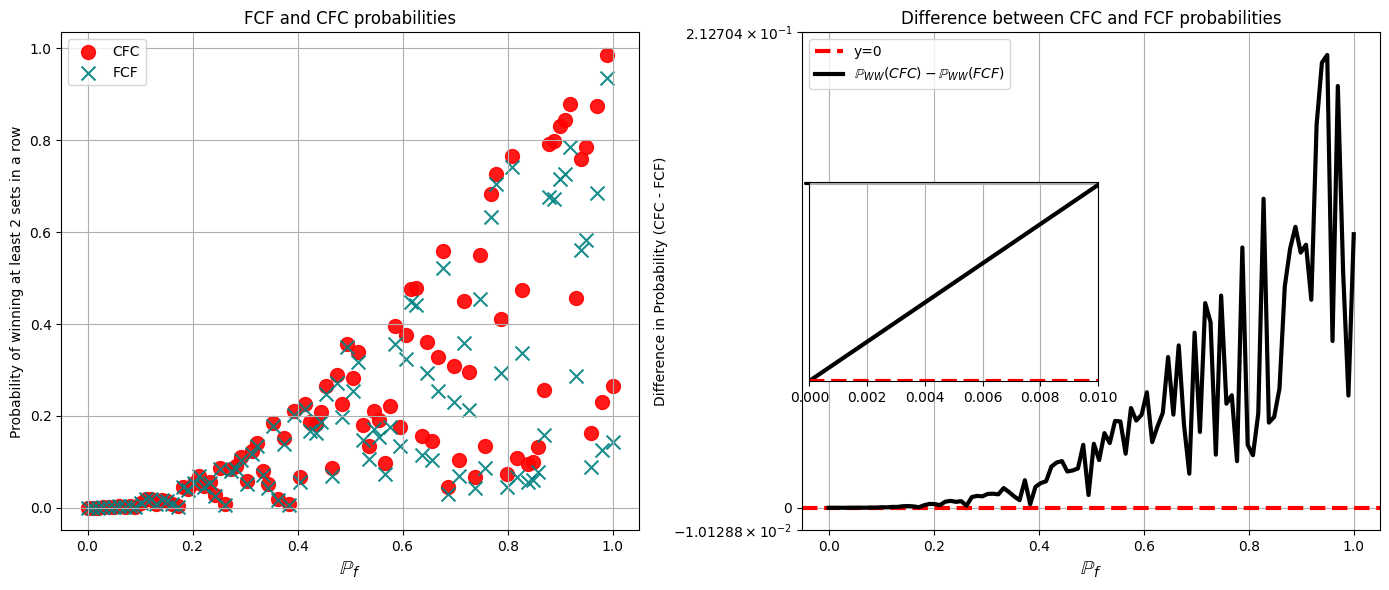

In [12]:
#### Winning the middle set always beats playing the father twice. We demonstrate this by plotting the CFC and FCF probabilities.

from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

cmap = get_cmap('gnuplot')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# a is the probability of win against the father, b is the probability of win against the champion: 1 ≤ a < b ≤ 0
a = np.linspace(0, 1, 100)
b = np.random.uniform(0, a, len(a))

p_ww_fcf = fcf_probability(a, b)
p_ww_cfc = cfc_probability(a, b)

color = cmap(0)

ax1.scatter(a, p_ww_cfc, marker='o', label='CFC', color='red', s=100, alpha=0.9)
ax1.scatter(a, p_ww_fcf, marker='x', label='FCF', color='teal', s=100, alpha=0.9)

ax1.set_xlabel(r'$\mathbb{P}_{f}$', fontsize=14)
ax1.set_ylabel(r'Probability of winning at least 2 sets in a row')
ax1.legend()
ax1.grid('both')
ax1.set_title('FCF and CFC probabilities')

# Difference plot
difference = p_ww_cfc - p_ww_fcf

ax2.axhline(y=0, color='r', linestyle='--', linewidth=3, label='y=0')
ax2.plot(a, difference, linewidth=3, label=r'$\mathbb{P}_{WW}(CFC) - \mathbb{P}_{WW}(FCF)$', color=color)

ax2.set_xlabel(r'$\mathbb{P}_{f}$', fontsize=14)
ax2.set_ylabel(r'Difference in Probability (CFC - FCF)')
ax2.legend()
ax2.grid('both')
ax2.set_yscale('symlog')
ax2.set_title('Difference between CFC and FCF probabilities')

# Add log inset
ax_inset = inset_axes(ax2, width="50%", height="40%", loc='center left')
ax_inset.plot(a, difference, linewidth=3, color=color)
ax_inset.axhline(y=0, color='r', linestyle='--', linewidth=3)
ax_inset.set_xlim(0, 0.01)
ax_inset.set_ylim(min(difference), 0.1)
ax_inset.set_yscale('log')
ax_inset.set_yticklabels([])
ax_inset.grid('both')

plt.tight_layout()
plt.show()